# EDA

This notebook performs **Exploratory Data Analysis (EDA)** to understand the dataset, the target (`medv`), feature distributions, relationships, and potential data issues (outliers, skew, multicollinearity).  
These findings guide **modeling and explainability** choices (what to standardize/transform and what patterns to expect from explanations).

#### There are 14 attributes in each case of the dataset. They are:
1. **CRIM** - per capita crime rate by town
2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS** - proportion of non-retail business acres per town.
4. **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX** - nitric oxides concentration (parts per 10 million)
6. **RM** - average number of rooms per dwelling
7. **AGE** - proportion of owner-occupied units built prior to 1940
8. **DIS** - weighted distances to five Boston employment centres
9. **RAD** - index of accessibility to radial highways
10. **TAX** - full-value property-tax rate per $10,000
11. **PTRATIO** - pupil-teacher ratio by town
12. **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT** - % lower status of the population
14. **MEDV** - Median value of owner-occupied homes in $1000's

- **Note**:
Variable *#14* seems to be censored at 50.00.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from faa_p2.config import RAW_DATA_FILE, CLEAN_DATA_FILE

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(CLEAN_DATA_FILE)

display(df.head())
print("Shape:", df.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Shape: (506, 14)


In [4]:
# Data overview / quality checks
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top):")
display(missing[missing > 0])

print("Duplicates:", df.duplicated().sum())

# basic numeric summary
display(df.describe().T)

Columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

Dtypes:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Missing values (top):


Series([], dtype: int64)

Duplicates: 0


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


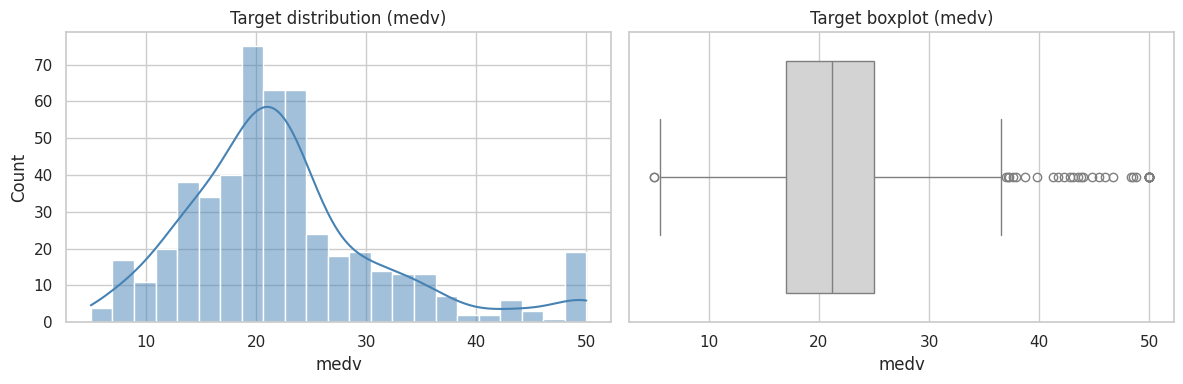

medv summary:


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

medv skew: 1.1080984082549072
medv kurtosis: 1.495196944165818
medv == 50 count: 16
medv == 50 proportion: 0.03162055335968379


In [5]:
# Target analysis: medv
target = "medv"

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[target], kde=True, ax=ax[0], color="steelblue")
ax[0].set_title("Target distribution (medv)")

sns.boxplot(x=df[target], ax=ax[1], color="lightgray")
ax[1].set_title("Target boxplot (medv)")

plt.tight_layout()
plt.show()

print("medv summary:")
display(df[target].describe())
print("medv skew:", float(df[target].skew()))
print("medv kurtosis:", float(df[target].kurt()))

# check for typical Boston Housing ceiling at 50
print("medv == 50 count:", int((df[target] == 50).sum()))
print("medv == 50 proportion:", float((df[target] == 50).mean()))

#### Target (`medv`) distribution insights

- The target has **506 observations** with an average house value of **~22.53** (in **$1000s**), and a standard deviation of **~9.20**, indicating **substantial variability** in prices.
- The distribution is **right-skewed** (**skew = 1.11**): most homes cluster in the lower-to-mid range, with a **longer tail** toward higher prices.
- **More extreme values than a normal distribution** (**kurtosis = 1.50**), consistent with the visible high-end outliers in the boxplot.
- There is a clear **ceiling effect at 50**: **16** samples (**~3.16%**) hit the maximum value.  
  This cap can bias modeling and XAI (predictions/explanations near the upper end may be constrained even if features suggest higher values).

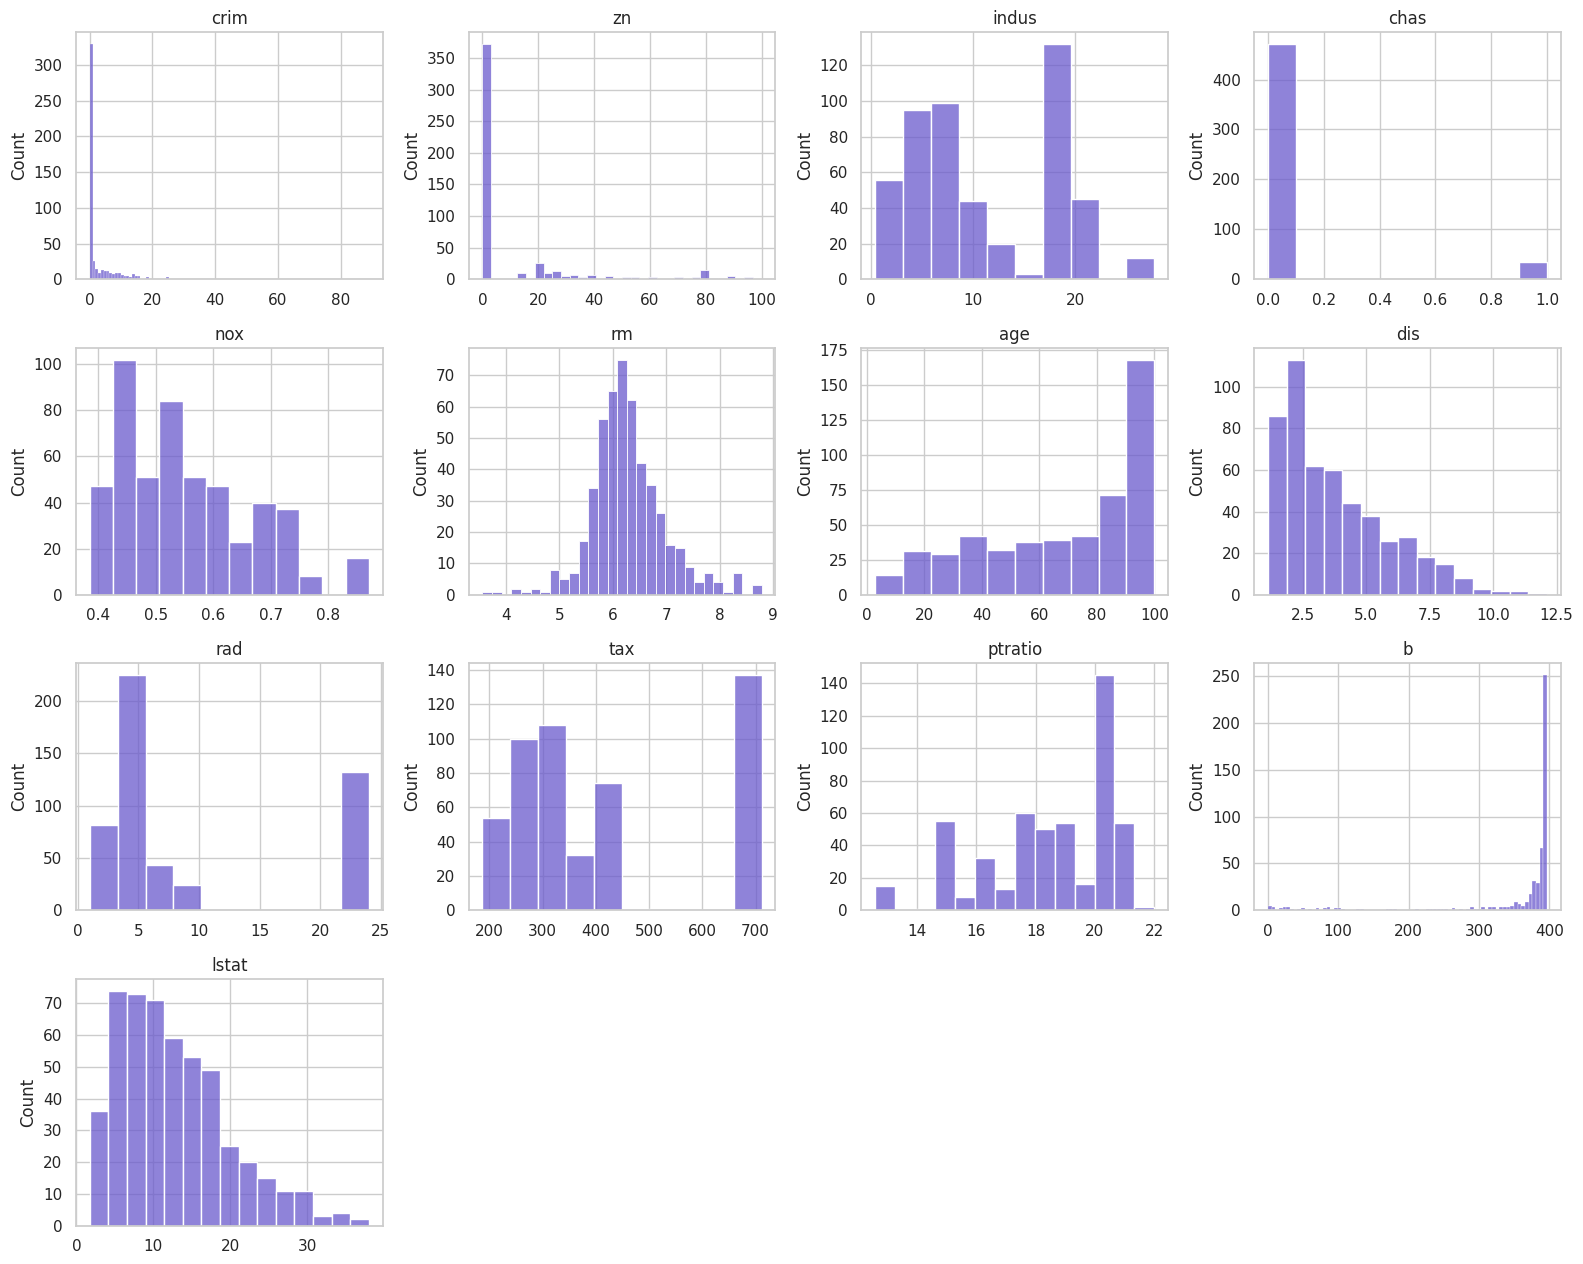

,skewness
crim,5.223149
chas,3.405904
b,-2.890374
zn,2.225666
dis,1.011781
rad,1.004815
lstat,0.906460
ptratio,-0.802325
nox,0.729308
tax,0.669956


In [6]:
# Feature distributions (univariate)
feature_cols = [c for c in df.columns if c != target]

ncols = 4
nrows = int(np.ceil(len(feature_cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3.2 * nrows))
axes = np.array(axes).reshape(nrows, ncols)

for i, col in enumerate(feature_cols):
    ax = axes[i // ncols, i % ncols]
    sns.histplot(df[col], kde=False, ax=ax, color="slateblue")
    ax.set_title(col)
    ax.set_xlabel("")
    
for j in range(i + 1, nrows * ncols):
    axes[j // ncols, j % ncols].axis("off")

plt.tight_layout()
plt.show()

# skewness scan (useful for deciding log/robust scaling; also affects explanation stability)
skew = df[feature_cols].skew(numeric_only=True).sort_values(key=np.abs, ascending=False)
display(skew.to_frame("skewness").head(10))

#### Univariate distribution + skewness insights

- **Strong right-skew (heavy tails / extreme values):** `crim` (5.22), `chas` (3.41), `zn` (2.23).  
  This means most observations are small/zero with a few very large values (especially `crim` and `zn`).

- **Notable left-skew:** `b` (-2.89) and `ptratio` (-0.80).  
  `b` is highly concentrated near its upper range with a tail toward smaller values.

- **Moderate right-skew:** `dis` (1.01), `rad` (1.00), `lstat` (0.91), `nox` (0.73), `tax` (0.67).  

- **Distribution shapes visible in the histograms:**
  - `chas` is **binary** and heavily imbalanced (mostly 0’s)
    - treat as binary variable rather than continuous.
  - `rad` and `tax` seem to be **clustered**, suggesting area-based grouping rather than smooth variation.

- **Why this matters for XAI:** skewed and discrete features can produce **step-like** or **outlier-driven** explanations. Interpreting feature contributions should consider these distribution constraints.

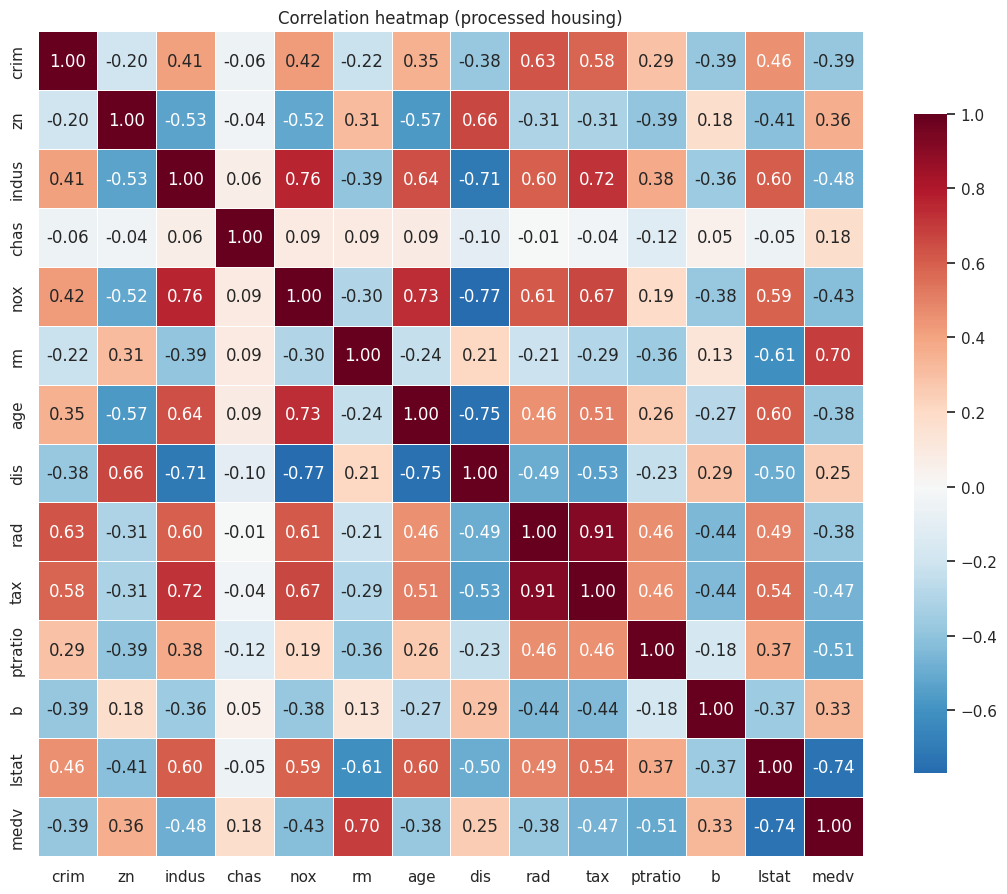

,corr_with_medv
lstat,-0.737663
rm,0.695360
ptratio,-0.507787
indus,-0.483725
tax,-0.468536
nox,-0.427321
crim,-0.388305
rad,-0.381626
age,-0.376955
zn,0.360445


Top + drivers: {'lstat': -0.7376627261740145, 'rm': 0.6953599470715401, 'ptratio': -0.5077866855375623, 'indus': -0.48372516002837274, 'tax': -0.4685359335677667}
Top - drivers: {'age': -0.3769545650045961, 'zn': 0.3604453424505433, 'b': 0.3334608196570662, 'dis': 0.249928734085904, 'chas': 0.17526017719029868}


In [7]:
# Correlation structure (multicollinearity + key drivers for XAI)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(11, 9))
sns.heatmap(corr, cmap="RdBu_r", center=0, square=True, cbar_kws={"shrink": 0.8}, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap (processed housing)")
plt.tight_layout()
plt.show()

# top correlations with target (medv)
corr_target = corr[target].drop(target).sort_values(key=np.abs, ascending=False)
display(corr_target.to_frame("corr_with_medv"))

print("Top + drivers:", corr_target.head(5).to_dict())
print("Top - drivers:", corr_target.tail(5).to_dict())

#### Correlation insights (with `medv`)

- **Strongest associations with house price**
  - `lstat` shows the **strongest negative** correlation with `medv` (**-0.74**)
    - higher % of lower-status population is associated with **lower** house prices.
  - `rm` shows a **strong positive** correlation (**+0.70**)
    - more rooms is associated with **higher** house prices.

- **Moderate negative correlations**
  - `ptratio` (**-0.51**), `indus` (**-0.48**), and `tax` (**-0.47**) are moderately negatively correlated with `medv`  
    - higher pupil-teacher ratio, more industrial area, and higher taxes tend to align with **lower** prices.

- **Weaker linear effects**
  - `chas` (**+0.18**) and `dis` (**+0.25**) have weak positive correlations
    - proximity to the river and distance effects exist but are **not strong** linearly.
  - `zn` (**+0.36**) and `b` (**+0.33**) show small-to-moderate positive correlations with `medv`.

- **Multicollinearity note (important for XAI)**
  - Some predictors are **highly correlated with each other** (`rad` vs `tax` is ~**+0.91**, and strong links also appear among `nox`, `indus`, `age`, `dis`).
  - This can make feature attributions **less stable**: importance may be “shared” across correlated variables, so explanations should be interpreted with this in mind.

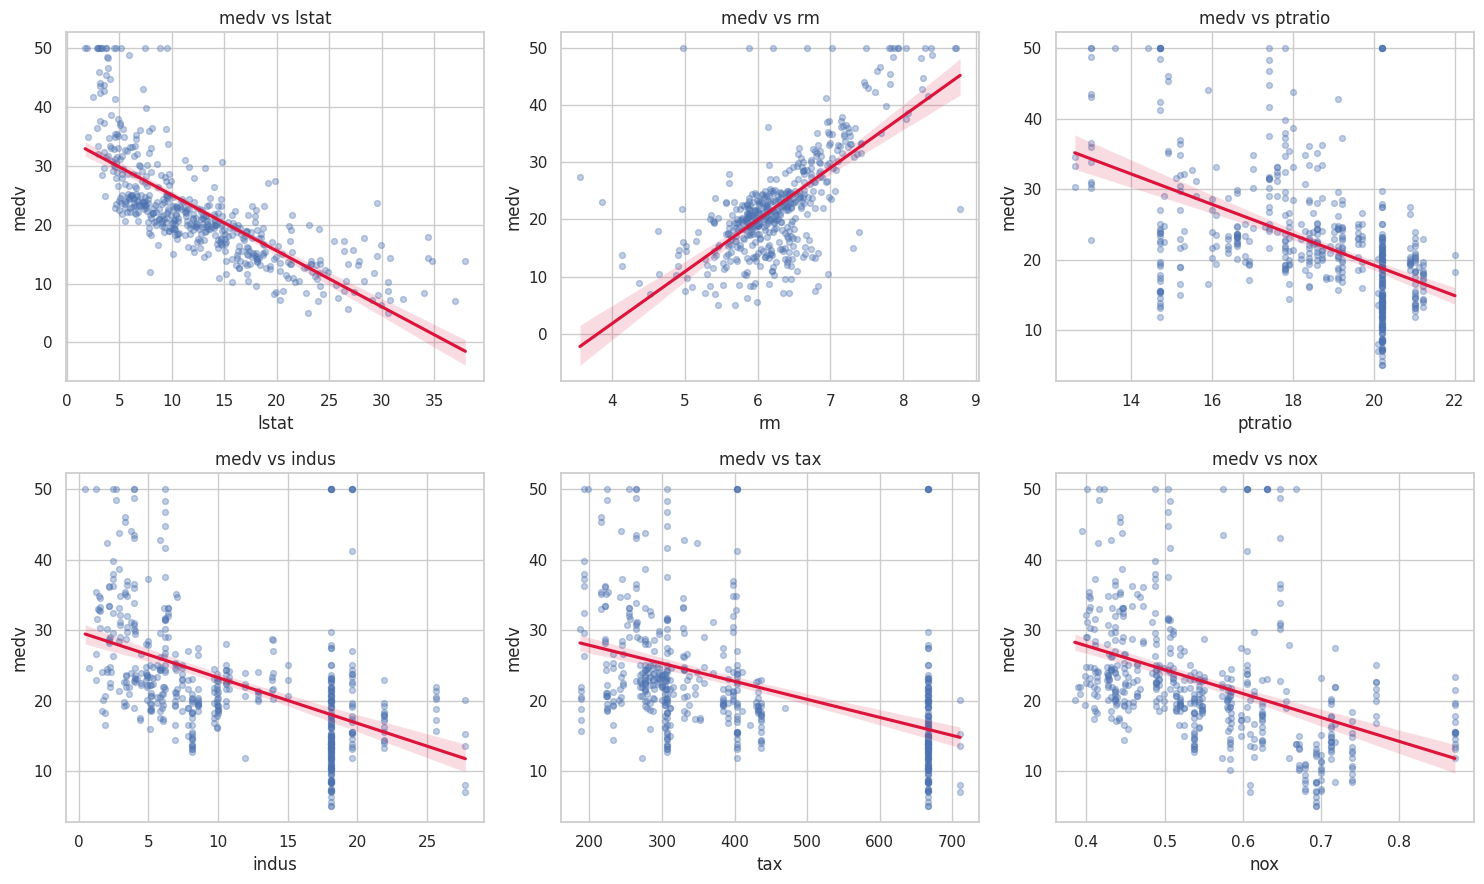

In [8]:
# Pairwise relationships with target (interpretable plots)
top_k = 6
top_features = corr_target.head(top_k).index.tolist()

ncols = 3
nrows = int(np.ceil(top_k / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4.5 * nrows))
axes = np.array(axes).reshape(nrows, ncols)

for i, col in enumerate(top_features):
    ax = axes[i // ncols, i % ncols]
    sns.regplot(
        data=df, x=col, y=target, ax=ax,
        scatter_kws={"alpha": 0.35, "s": 18},
        line_kws={"color": "crimson"}
    )
    ax.set_title(f"{target} vs {col}")

for j in range(i + 1, nrows * ncols):
    axes[j // ncols, j % ncols].axis("off")

plt.tight_layout()
plt.show()

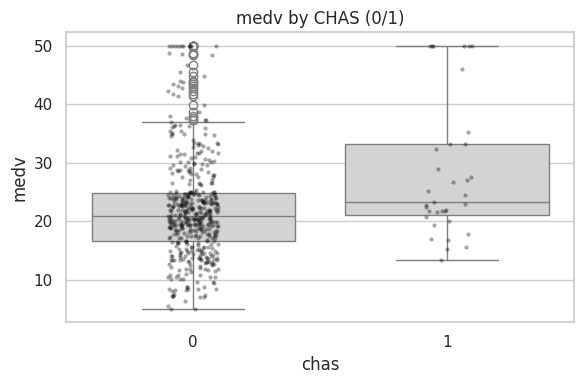

,count,mean,std,min,25%,50%,75%,max
chas,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


In [9]:
# Categorical-ish feature: CHAS (0/1) vs target
# chas is binary in Boston Housing (Charles River adjacency)
if "chas" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="chas", y=target, color="lightgray")
    sns.stripplot(data=df, x="chas", y=target, color="black", alpha=0.35, size=3)
    plt.title("medv by CHAS (0/1)")
    plt.tight_layout()
    plt.show()

    display(df.groupby("chas")[target].describe())

#### `CHAS` (river adjacency) vs `medv` — key insights

- **Homes near the Charles River (`chas=1`) are more expensive on average:**  
  Mean `medv` is **28.44** for `chas=1` vs **22.09** for `chas=0` (≈ **+6.35** in $1000s).

- **Median is also higher for `chas=1`:**  
  Median `medv` is **23.3** (`chas=1`) vs **20.9** (`chas=0`)

- **Much smaller group for `chas=1` (class imbalance):**  
  Only **35** river tracts vs **471** non-river tracts. Any conclusions about `chas=1` are based on fewer samples and are less stable.

- **Higher variability for `chas=1`:**  
  Standard deviation is **11.82** (`chas=1`) vs **8.83** (`chas=0`), meaning river-adjacent prices are not only higher but also **more spread out**.

,feature,n_outliers_iqr,low,high
10,b,77,344.106250,427.496250
1,zn,68,-18.750000,31.250000
0,crim,66,-5.310511,9.069639
4,rm,30,4.778500,7.730500
9,ptratio,15,13.200000,24.400000
11,lstat,7,-8.057500,31.962500
6,dis,5,-2.532200,9.820800
2,indus,0,-14.175000,37.465000
3,nox,0,0.186500,0.886500
5,age,0,-28.550000,167.650000


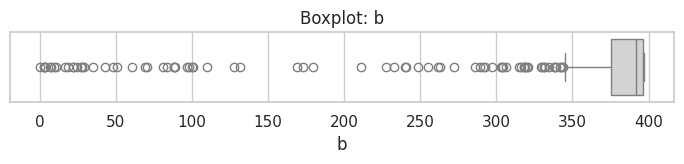

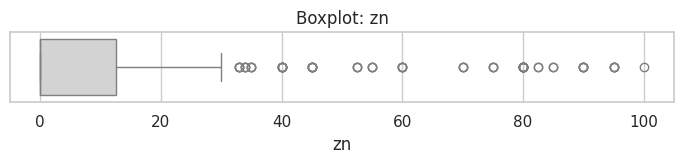

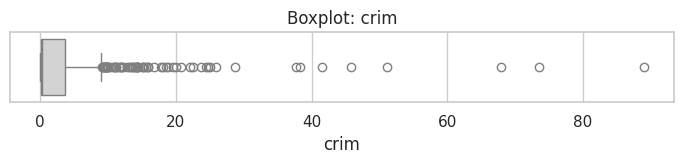

In [10]:
# Outlier scan (IQR rule)
def iqr_outlier_summary(dataframe, cols):
    rows = []
    for c in cols:
        if  c == 'chas': # skip binary feature
            continue
        q1, q3 = dataframe[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        n = int(((dataframe[c] < low) | (dataframe[c] > high)).sum())
        rows.append((c, n, float(low), float(high)))
    return pd.DataFrame(rows, columns=["feature", "n_outliers_iqr", "low", "high"]).sort_values("n_outliers_iqr", ascending=False)

outliers = iqr_outlier_summary(df, feature_cols)
display(outliers.head(10))

# visualize a couple of heavy-outlier features
for col in outliers.head(3)["feature"].tolist():
    plt.figure(figsize=(7, 1.8))
    sns.boxplot(x=df[col], color="lightgray")
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

#### Outlier scan (IQR rule) — essential conclusions

- **Most “outlier-heavy” features:**  
  `b` (**77**), `zn` (**68**), `crim` (**66**) have the largest number of IQR outliers, these variables are **highly skewed** and contain many extreme values.

- **Moderate outliers in influential predictors:**  
  `rm` has **30** outliers which is a number of unusually low/high room counts that may act as **high-leverage** points in linear models.

- **Few outliers in several continuous features:**  
  `lstat` (**7**) and `dis` (**5**) have relatively few IQR outliers while `indus` and `nox` show **0** IQR outliers (within the IQR thresholds).

- **Modeling / XAI implication:**  
  Outlier-heavy and skewed features (`crim`, `zn`, `b`) can **dominate model fitting** and produce **unstable explanations** for extreme observations. **Robust scaling / transformations** (ex: `log1p` for `crim`/`zn`) should be prefered rather than dropping many rows.

In [11]:
# Distribution of feature ranges
# quantiles help interpret SHAP/LIME: "is this value high/low?"
quantiles = df[feature_cols + [target]].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
quantiles.columns = [f"q{int(q*100):02d}" for q in quantiles.columns]
display(quantiles)

def summarize_quantiles(qtbl: pd.DataFrame, *, top_n: int = 8) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Return:
      - top_tail: top_n features with the heaviest right tail
      - all_summaries: a compact, readable table with per-feature context
    """
    s = qtbl.copy()

    s["iqr"] = s["q75"] - s["q25"]
    s["tail99_minus_q75"] = s["q99"] - s["q75"]

    eps = 1e-12
    s["tail_score"] = (s["tail99_minus_q75"] + eps) / (s["iqr"] + eps)

    # If IQR is zero (binary / constant-ish), tail_score is not meaningful
    s.loc[s["iqr"].abs() < 1e-9, "tail_score"] = np.nan

    # % zeros (useful for zero-inflated features)
    features_in_df = [c for c in s.index if c in df.columns]
    s["zero_share"] = (df[features_in_df] == 0).mean(numeric_only=True).reindex(s.index)

    def _notes(r) -> str:
        tags = []
        if pd.notna(r["zero_share"]) and r["zero_share"] >= 0.30:
            tags.append("many zeros")
        if r["q99"] == r["q95"]:
            tags.append("upper tail clustered/capped")
        if r["tail_score"] >= 3:
            tags.append("heavy right tail")
        return ", ".join(tags) if tags else "ok"

    s["notes"] = s.apply(_notes, axis=1)

    # build a readable output (separate columns, rounded)
    out = s[["q50", "q25", "q75", "q95", "q99", "zero_share", "tail_score", "notes"]].copy()
    out = out.rename(
        columns={
            "q50": "median",
            "q25": "p25",
            "q75": "p75",
            "q95": "p95",
            "q99": "p99",
            "zero_share": "zero%",
        }
    )

    out["zero%"] = (100 * out["zero%"]).round(1)
    for c in ["median", "p25", "p75", "p95", "p99", "tail_score"]:
        out[c] = out[c].round(3)

    top_tail = out.sort_values("tail_score", ascending=False).head(top_n)
    all_summaries = out.sort_values("tail_score", ascending=False)
    return top_tail, all_summaries

# make pandas show wide tables + dont truncate columns
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 160)
pd.set_option("display.max_columns", 50)

top_tail, all_summaries = summarize_quantiles(quantiles, top_n=10)

print("Heaviest right tails (most outlier-prone):")
display(top_tail)

print("\nAll features (sorted by outlier-proneness):")
display(all_summaries)

,q01,q05,q25,q50,q75,q95,q99
crim,0.01361,0.027910,0.082045,0.25651,3.677083,15.78915,41.37033
zn,0.00000,0.000000,0.000000,0.00000,12.500000,80.00000,90.00000
indus,1.25350,2.180000,5.190000,9.69000,18.100000,21.89000,25.65000
chas,0.00000,0.000000,0.000000,0.00000,0.000000,1.00000,1.00000
nox,0.39800,0.409250,0.449000,0.53800,0.624000,0.74000,0.87100
rm,4.52445,5.314000,5.885500,6.20850,6.623500,7.58750,8.33500
age,6.61000,17.725000,45.025000,77.50000,94.075000,100.00000,100.00000
dis,1.20654,1.461975,2.100175,3.20745,5.188425,7.82780,9.22277
rad,1.00000,2.000000,4.000000,5.00000,24.000000,24.00000,24.00000
tax,188.00000,222.000000,279.000000,330.00000,666.000000,666.00000,666.00000


Heaviest right tails (most outlier-prone):


,median,p25,p75,p95,p99,zero%,tail_score,notes
crim,0.257,0.082,3.677,15.789,41.370,0.0,10.485,heavy right tail
zn,0.000,0.000,12.500,80.000,90.000,73.5,6.200,"many zeros, heavy right tail"
medv,21.200,17.025,25.000,43.400,50.000,0.0,3.135,heavy right tail
rm,6.208,5.885,6.624,7.588,8.335,0.0,2.319,ok
lstat,11.360,6.950,16.955,26.808,33.918,0.0,1.696,ok
nox,0.538,0.449,0.624,0.740,0.871,0.0,1.411,ok
dis,3.207,2.100,5.188,7.828,9.223,0.0,1.306,ok
indus,9.690,5.190,18.100,21.890,25.650,0.0,0.585,ok
ptratio,19.050,17.400,20.200,21.000,21.200,0.0,0.357,ok
age,77.500,45.025,94.075,100.000,100.000,0.0,0.121,upper tail clustered/capped



All features (sorted by outlier-proneness):


,median,p25,p75,p95,p99,zero%,tail_score,notes
crim,0.257,0.082,3.677,15.789,41.370,0.0,10.485,heavy right tail
zn,0.000,0.000,12.500,80.000,90.000,73.5,6.200,"many zeros, heavy right tail"
medv,21.200,17.025,25.000,43.400,50.000,0.0,3.135,heavy right tail
rm,6.208,5.885,6.624,7.588,8.335,0.0,2.319,ok
lstat,11.360,6.950,16.955,26.808,33.918,0.0,1.696,ok
nox,0.538,0.449,0.624,0.740,0.871,0.0,1.411,ok
dis,3.207,2.100,5.188,7.828,9.223,0.0,1.306,ok
indus,9.690,5.190,18.100,21.890,25.650,0.0,0.585,ok
ptratio,19.050,17.400,20.200,21.000,21.200,0.0,0.357,ok
age,77.500,45.025,94.075,100.000,100.000,0.0,0.121,upper tail clustered/capped


To look at the model interpretability locally we'll take 3 samples:

- One random sample, let it be the 15th row;
- Maximum target value sample;
- Minimum target value sample.

In [13]:
max_medv_id = df[target].idxmax()
min_medv_id = df[target].idxmin()

print("max_medv_id:", max_medv_id, "max medv:", float(df.loc[max_medv_id, "medv"]))
print("min_medv_id:", min_medv_id, "min medv:", float(df.loc[min_medv_id, "medv"]))

# all rows that share the max/min medv value (in case of ties)
max_medv_ids = df.index[df["medv"] == df["medv"].max()].tolist()
min_medv_ids = df.index[df["medv"] == df["medv"].min()].tolist()

print("all max_medv_ids (ties):", max_medv_ids)
print("all min_medv_ids (ties):", min_medv_ids)

max_medv_id: 161 max medv: 50.0
min_medv_id: 398 min medv: 5.0
all max_medv_ids (ties): [161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372]
all min_medv_ids (ties): [398, 405]
